In [397]:
%load_ext autoreload
%autoreload 2

import numpy as np
import torch

import matplotlib.pyplot as plt 
import matplotlib 
matplotlib.rcParams.update({'font.size': 24, 'font.family': 'Helvetica', 'text.usetex': False})
%matplotlib inline

from utils.models import MLP
from utils.trainer import train_MLP
from utils.data import create_xor_dataset
from utils.plotting import plot_var

import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


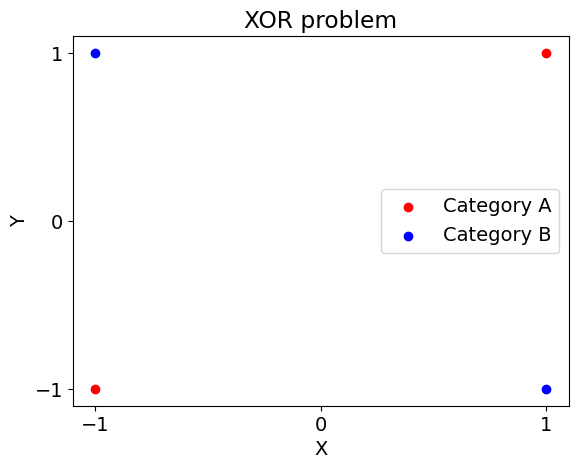

In [46]:
x1 = np.array ([-1., -1., 1., 1.], dtype = np.float32)
x2 = np.array ([-1., 1., -1., 1.], dtype = np.float32)
y  = np.array ([-1., 1., 1., -1.],dtype = np.float32)

plt.scatter(x1[y == -1.], x2[y == -1.], c = 'r', label = 'Category A')
plt.scatter(x1[y == 1.], x2[y == 1.], c = 'b', label = 'Category B')
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.legend()
plt.title('XOR problem')

X = torch.tensor([x1, x2]).T
y = torch.tensor(y).unsqueeze(1)

In [498]:
n_runs = 20
n_epochs = 5000  # Number of epochs
dim_input = 2  # Input dimension = (X, Y)
dim_hidden = 500  # Hidden neurons
dim_output = 1  # Output dimension = Category A or B (0, 1)

lr = 2e-3  # Learning rate
# Initialization scale
w1_inits = [0.0025, 0.25]
# w1_inits = [0.001,0.01,0.1,0.5]
w2_init = 1/dim_hidden

models = []
losses = np.zeros((len(w1_inits), n_runs, n_epochs))

# Training
for w_i, w1_init in enumerate(w1_inits):
    for r_i in range(n_runs):
        # Model instantiation
        dlnn_model = MLP(dim_input, dim_hidden, dim_output, w1_init, w2_init)
    
        loss_per_run, _ = train_MLP(dlnn_model, X, y, n_epochs=n_epochs, lr=lr)
        losses[w_i, r_i, :] = loss_per_run

    models.append(dlnn_model)

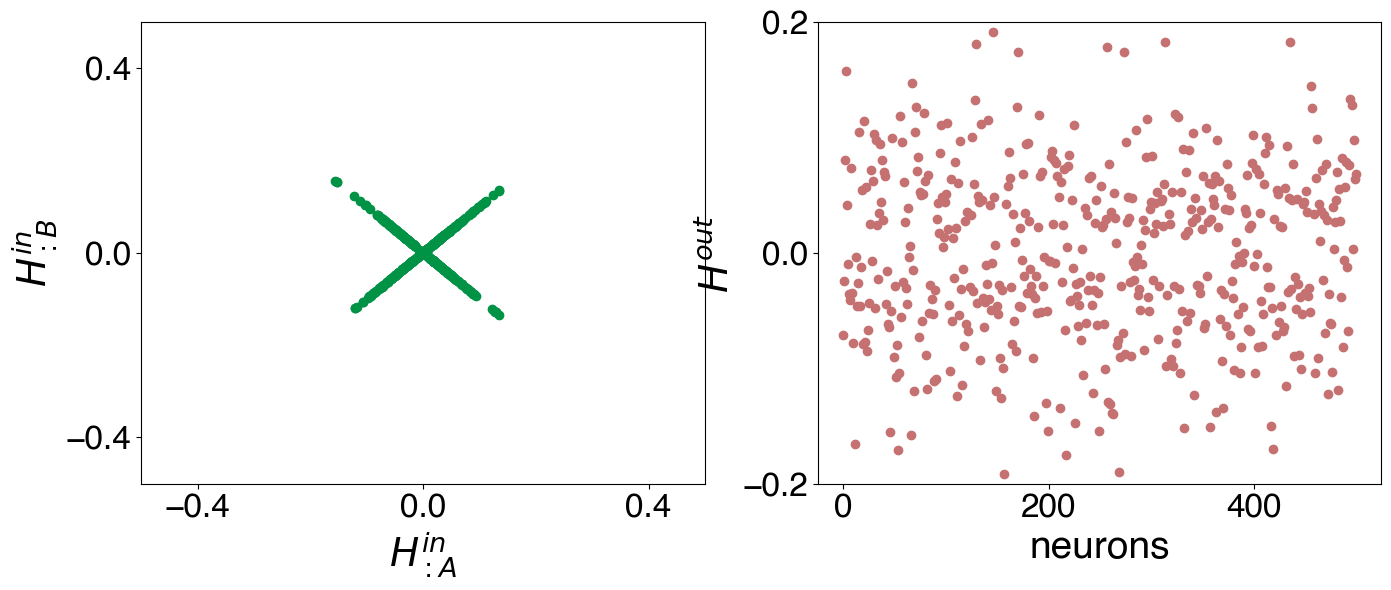

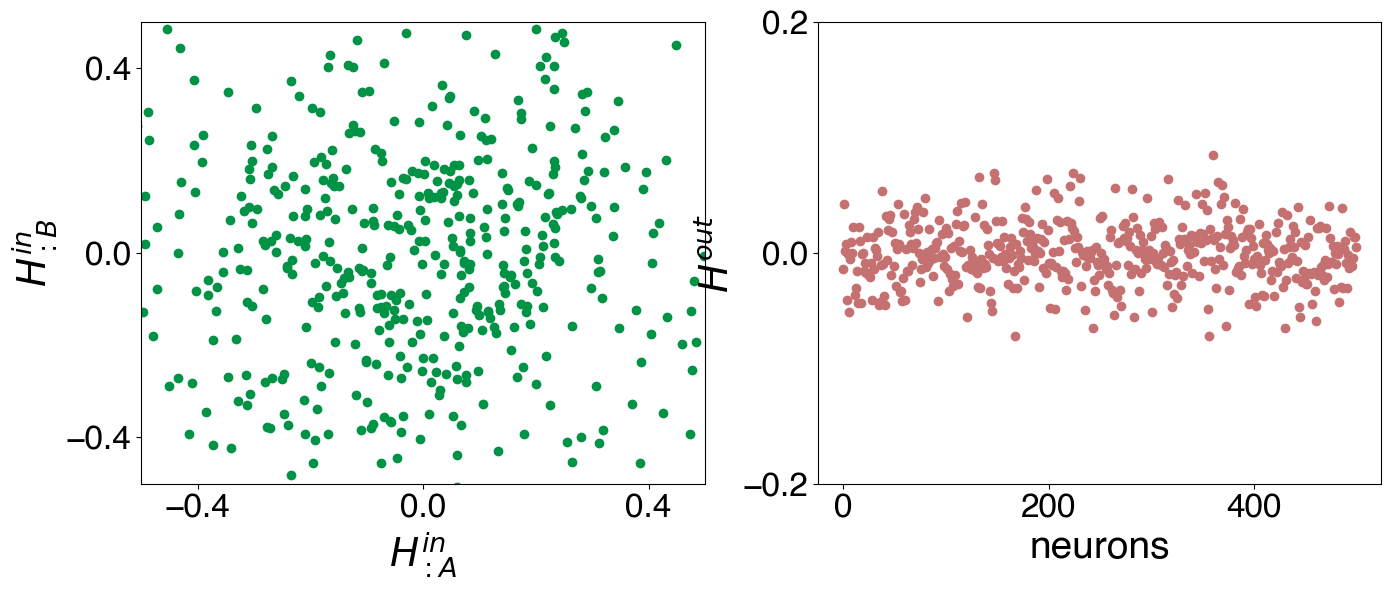

In [499]:
rich_lazy_models = [models[0], models[-1]]
model_titles = ['rich', 'lazy']

for w_i, weight in enumerate(model_titles):
    model = rich_lazy_models[w_i]
    
    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(16, 6)

    for p_i, (name, param) in enumerate(model.named_parameters()):
        axis = axes[p_i]

        if name == 'in_hid.weight':
            in_hid = param.detach().numpy()
            axis.scatter(in_hid[:, 0], in_hid[:, 1], color=(0/255, 146/255, 69/255))

            axis.set_xlabel(r"$H^{in}_{:A}$", fontsize=28)
            axis.set_ylabel(r"$H^{in}_{:B}$", fontsize=28)
            axis.set_xlim(-0.5, 0.5)
            axis.set_ylim(-0.5, 0.5)
            axis.set_xticks([-0.4, 0, 0.4])
            axis.set_yticks([-0.4, 0, 0.4])

        elif name == 'hid_out.weight':
            hid_out = param.detach().numpy()
            axis.scatter(np.arange(hid_out.shape[1]), hid_out[0], color=(198/255, 113/255, 113/255))

            axis.set_xlabel('neurons', fontsize=28)
            axis.set_ylabel(r"$H^{out}$", fontsize=28)
            axis.set_ylim(-0.2, 0.2)
            axis.set_yticks([-0.2, 0, 0.2])

## Repeated training of one contingency on noisy input

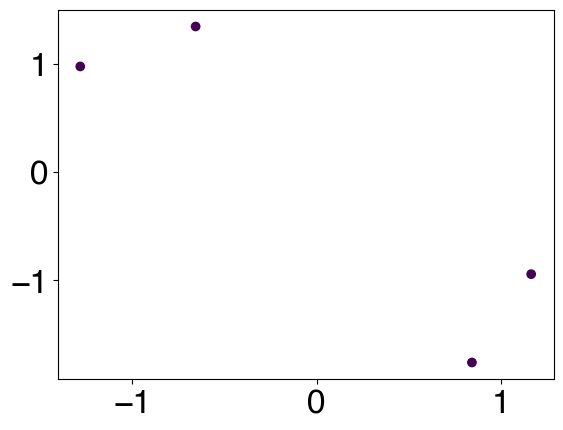

In [476]:
bev_bias_models = []
for model in models:
    bev_bias_models.append(copy.deepcopy(model))

bev_bias_x1 = np.array ([-1., 1., -1., 1.],  dtype = np.float32)
bev_bias_x2 = np.array ([1., -1., 1., -1.], dtype = np.float32)
bev_bias_y  = np.array ([1., 1., 1., 1.],dtype = np.float32)

bev_bias_X, bev_bias_y = create_xor_dataset(bev_bias_x1, bev_bias_x2, bev_bias_y, n_repeats=1, noise_lev=0.5)

plt.scatter(bev_bias_X[:, 0], bev_bias_X[:, 1], c = bev_bias_y)
# plt.xlim(-1.5, 1.5)
# plt.ylim(-1.5, 1.5)

In [473]:
n_runs = 20
n_epochs = 5000  # Number of epochs

lr = 2e-3  # Learning rate

bev_bias_losses = np.zeros((2, n_runs, n_epochs))
# Training
for m_i, bev_bias_model in enumerate([bev_bias_models[0], bev_bias_models[-1]]):
    for r_i in range(n_runs):
        bev_bias_loss_per_run, _ = train_MLP(bev_bias_model, bev_bias_X, bev_bias_y, n_epochs=n_epochs, lr=lr)
        bev_bias_losses[m_i, r_i, :] = bev_bias_loss_per_run

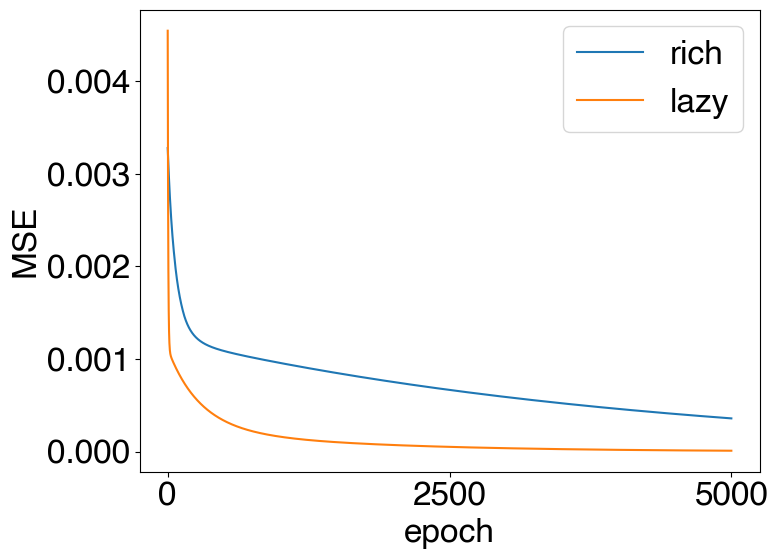

In [474]:
# Plotting losses after repeated training of one contingency
fig = plot_var(bev_bias_losses, y_ticks=None, fig_size=(8, 6))
# fig.savefig("bev_bias_loss_noise.svg")

## Via L2-regularization

In [500]:
bev_bias_models = []
for model in models:
    bev_bias_models.append(copy.deepcopy(model))

(-1.5, 1.5)

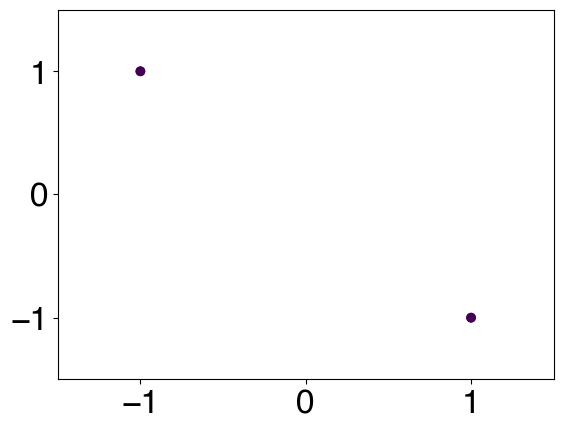

In [501]:
bev_bias_x1 = np.array ([-1., 1., -1., 1.],  dtype = np.float32)
bev_bias_x2 = np.array ([1., -1., 1., -1.], dtype = np.float32)
bev_bias_y  = np.array ([1., 1., 1., 1.],dtype = np.float32)

# bev_bias_x1 = np.array ([-1.], dtype = np.float32)
# bev_bias_x2 = np.array ([1.], dtype = np.float32)
# bev_bias_y  = np.array ([1.],dtype = np.float32)

# bev_bias_X = torch.tensor([bev_bias_x1, bev_bias_x2]).T
# bev_bias_y = torch.tensor(bev_bias_y).unsqueeze(1)

bev_bias_X, bev_bias_y = create_xor_dataset(bev_bias_x1, bev_bias_x2, bev_bias_y, n_repeats=1, noise_lev=0)

plt.scatter(bev_bias_X[:, 0], bev_bias_X[:, 1], c=bev_bias_y)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

In [502]:
n_runs = 20
n_epochs = 5000  # Number of epochs

lr = 2e-3  # Learning rate
wd_lambda = 0.005

bev_bias_losses = np.zeros((2, n_runs, n_epochs))
# Training
for m_i, bev_bias_model in enumerate([bev_bias_models[0], bev_bias_models[-1]]):
    for r_i in range(n_runs):
        bev_bias_loss_per_run, _ = train_MLP(bev_bias_model, bev_bias_X, bev_bias_y, n_epochs=n_epochs, lr=lr, wd_lambda=wd_lambda)
        bev_bias_losses[m_i, r_i, :] = bev_bias_loss_per_run

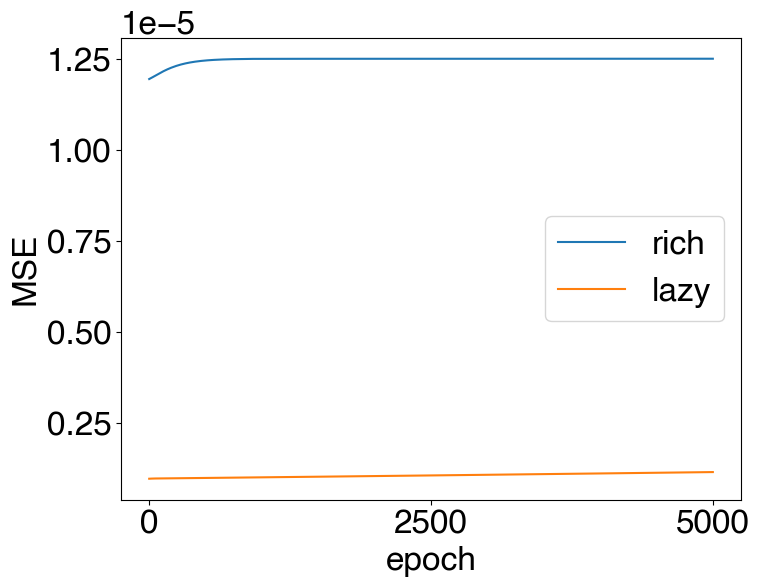

In [503]:
# Plotting losses after repeated training of one contingency
fig = plot_var(bev_bias_losses, y_ticks=None, fig_size=(8, 6))
# fig.savefig("bev_bias_loss_l2.svg")

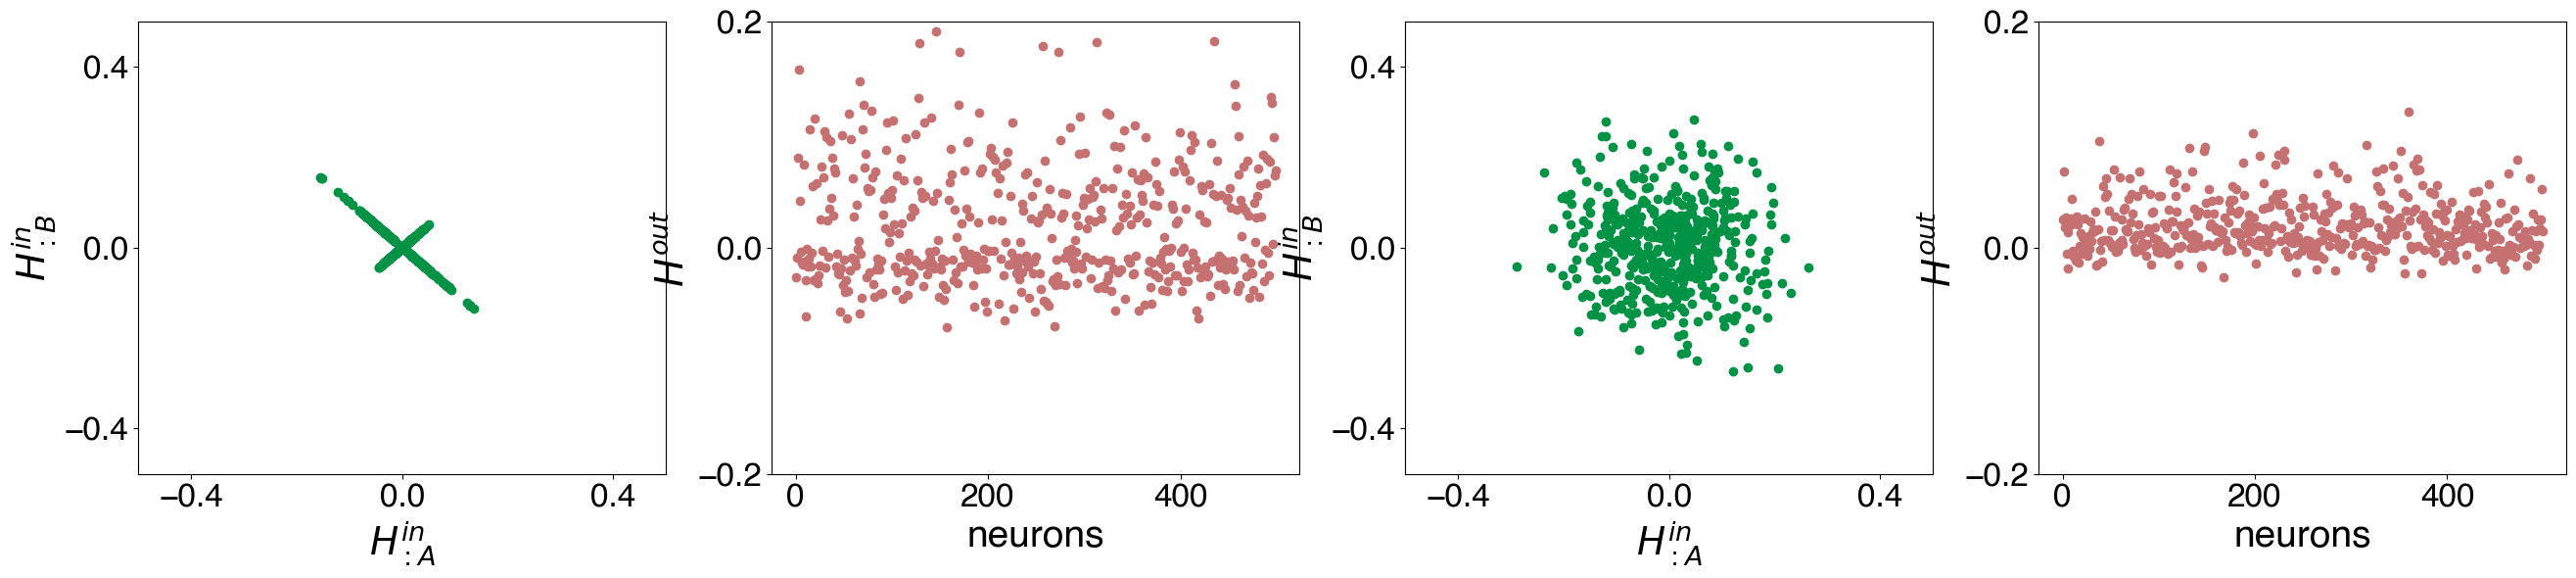

In [504]:
bev_bias_rich_lazy_models = [bev_bias_models[0], bev_bias_models[-1]]
model_titles = ['rich', 'lazy']
    
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(32, 6)

for m_i, model in enumerate(bev_bias_rich_lazy_models):
    for p_i, (name, param) in enumerate(model.named_parameters()):
        fig_i = m_i*2 + p_i
        axis = axes[fig_i]

        if name == 'in_hid.weight':
            in_hid = param.detach().numpy()
            axis.scatter(in_hid[:, 0], in_hid[:, 1], color=(0/255, 146/255, 69/255))

            axis.set_xlabel(r"$H^{in}_{:A}$", fontsize=28)
            axis.set_ylabel(r"$H^{in}_{:B}$", fontsize=28)
            axis.set_xlim(-0.5, 0.5)
            axis.set_ylim(-0.5, 0.5)
            axis.set_xticks([-0.4, 0, 0.4])
            axis.set_yticks([-0.4, 0, 0.4])

        elif name == 'hid_out.weight':
            hid_out = param.detach().numpy()
            axis.scatter(np.arange(hid_out.shape[1]), hid_out[0], color=(198/255, 113/255, 113/255))

            axis.set_xlabel('neurons', fontsize=28)
            axis.set_ylabel(r"$H^{out}$", fontsize=28)
            axis.set_ylim(-0.2, 0.2)
            axis.set_yticks([-0.2, 0, 0.2])
            
# plt.savefig("rich_lazy_learning_bev_bias_l2.svg")

## Replaying the other contingency

In [505]:
replay_bias_models = []
for bev_bias_model in bev_bias_models:
    replay_bias_models.append(copy.deepcopy(bev_bias_model))

(-1.5, 1.5)

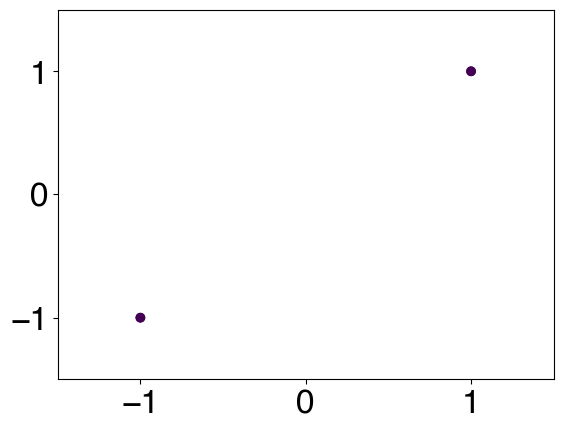

In [506]:
replay_bias_x1 = np.array ([1., -1., 1., -1.], dtype = np.float32)
replay_bias_x2 = np.array ([1., -1., 1., -1.], dtype = np.float32)
replay_bias_y  = np.array ([-1., -1., -1., -1.],dtype = np.float32)

# replay_bias_x1 = np.array ([-1.], dtype = np.float32)
# replay_bias_x2 = np.array ([-1.], dtype = np.float32)
# replay_bias_y  = np.array ([-1.],dtype = np.float32)

# replay_bias_X = torch.tensor([replay_bias_x1, replay_bias_x2]).T
# replay_bias_y = torch.tensor(replay_bias_y).unsqueeze(1)

replay_bias_X, replay_bias_y = create_xor_dataset(replay_bias_x1, replay_bias_x2, replay_bias_y, n_repeats=1, noise_lev=0)
plt.scatter(replay_bias_X[:, 0], replay_bias_X[:, 1], c = replay_bias_y)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

In [507]:
n_runs = 20
n_epochs = 5000  # Number of epochs

lr = 2e-3  # Learning rate

replay_bias_losses = np.zeros((2, n_runs, n_epochs))
# Training
for m_i, replay_bias_model in enumerate([replay_bias_models[0], replay_bias_models[-1]]):
    for r_i in range(n_runs):
        replay_bias_loss_per_run, _ = train_MLP(replay_bias_model, replay_bias_X, replay_bias_y, n_epochs=n_epochs, lr=lr)
        replay_bias_losses[m_i, r_i, :] = replay_bias_loss_per_run

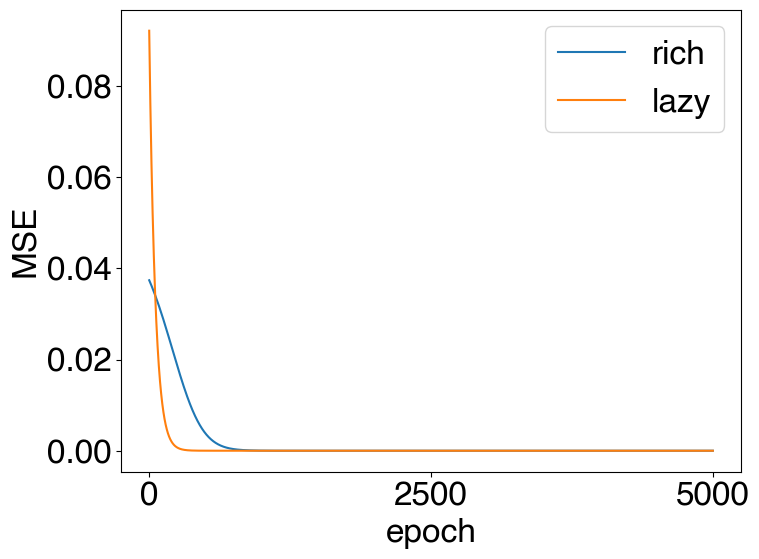

In [510]:
# Plotting losses after replaying the other contingency
fig = plot_var(replay_bias_losses, y_ticks=None, fig_size=(8, 6))
fig.savefig("replay_bias_loss_l2.svg")

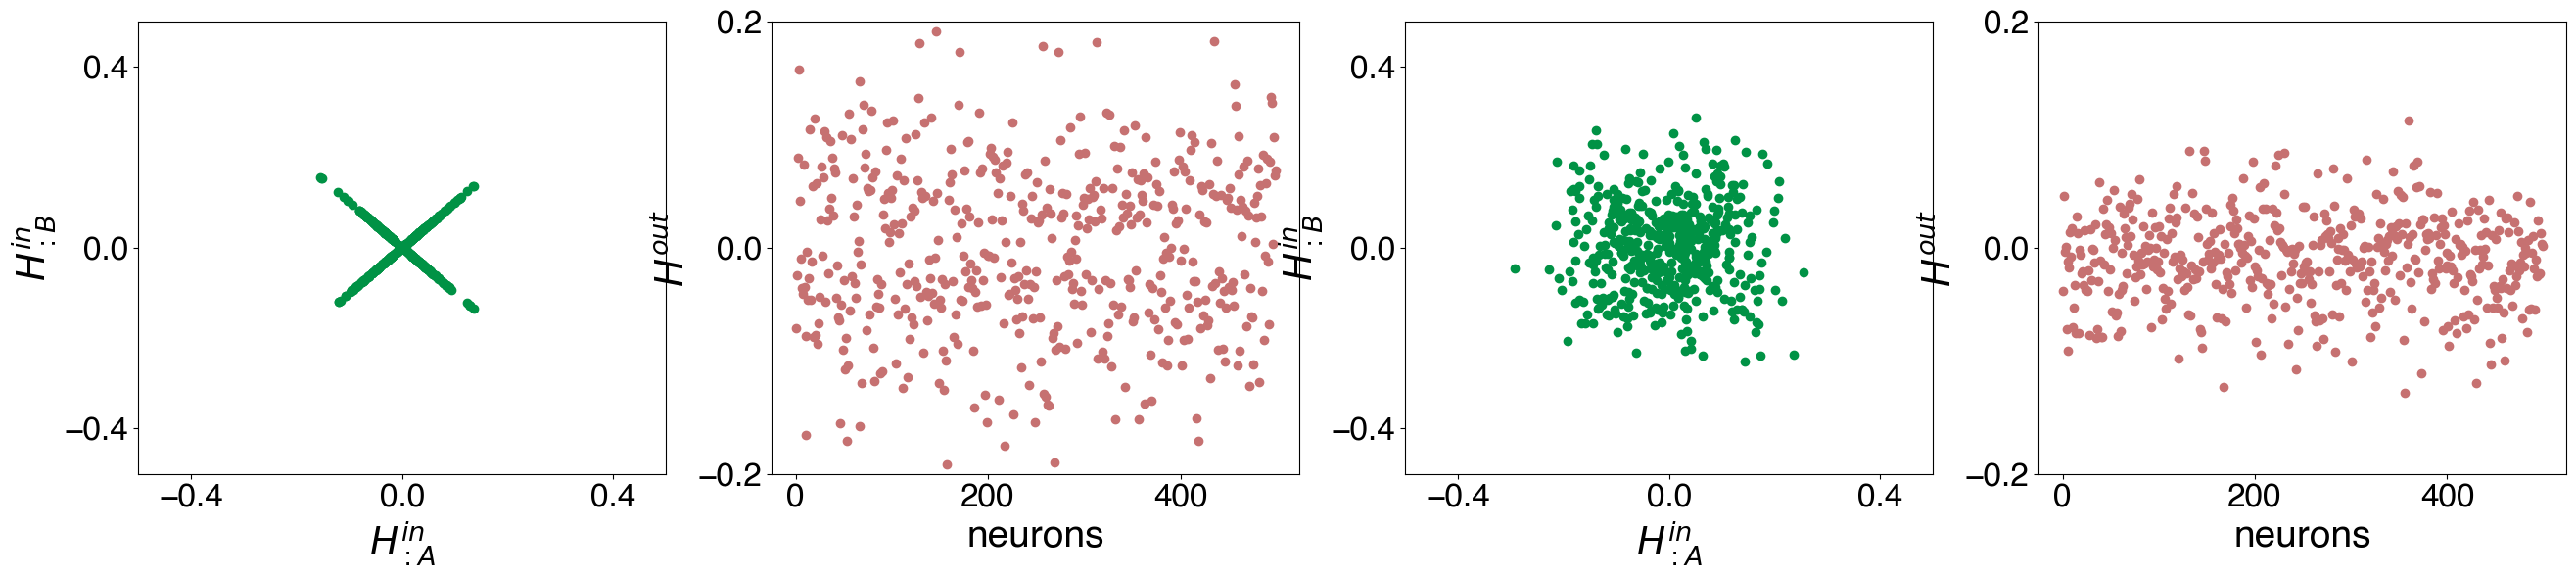

In [511]:
replay_bias_rich_lazy_models = [replay_bias_models[0], replay_bias_models[-1]]
model_titles = ['rich', 'lazy']
    
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(32, 6)

for m_i, model in enumerate(replay_bias_rich_lazy_models):
    for p_i, (name, param) in enumerate(model.named_parameters()):
        fig_i = m_i*2 + p_i
        axis = axes[fig_i]

        if name == 'in_hid.weight':
            in_hid = param.detach().numpy()
            axis.scatter(in_hid[:, 0], in_hid[:, 1], color=(0/255, 146/255, 69/255))

            axis.set_xlabel(r"$H^{in}_{:A}$", fontsize=28)
            axis.set_ylabel(r"$H^{in}_{:B}$", fontsize=28)
            axis.set_xlim(-0.5, 0.5)
            axis.set_ylim(-0.5, 0.5)
            axis.set_xticks([-0.4, 0, 0.4])
            axis.set_yticks([-0.4, 0, 0.4])

        elif name == 'hid_out.weight':
            hid_out = param.detach().numpy()
            axis.scatter(np.arange(hid_out.shape[1]), hid_out[0], color=(198/255, 113/255, 113/255))

            axis.set_xlabel('neurons', fontsize=28)
            axis.set_ylabel(r"$H^{out}$", fontsize=28)
            axis.set_ylim(-0.2, 0.2)
            axis.set_yticks([-0.2, 0, 0.2])
            
plt.savefig("rich_lazy_learning_replay_bias_l2.svg")